In [ ]:
### 写在前面：本次作业由于开始的晚了点，后面老师给的系统空间不够用，所以就在自己电脑上跑了，因为时间消耗太大，所以在此提交的作业，
### 只用了少量的数据，但是代码完全可以直接用于全部数据集。 
### 我维基百科下载的所有中文资源都已成功下载并解压好，在一个大文件夹下一共有AA,AB...一直到AM 个子文件夹，每个子文件夹下，又存在不同的
### txt 文本文档。在代码示例中，我按照源文件的存储风格，选取了四个txt 文档，分别存于两个文件夹，一个文件夹包含两个文档，
### 然后把两个文件夹放置于一个大文件夹内。 
### 在实现的时候，首先给定大文件夹路径，然后让程序能够分别自动读取大文件夹中，每个子文件夹的文档内容，统一写入一个文档里，再进行结巴分词
### 繁体转简体，以及进行词向量建模的操作，给出相似词，并画图！

In [2]:
import os
import codecs
import re
import jieba
from hanziconv import HanziConv
path = "/Users/jingweili/Documents/人工智能培训/NLP/word2vectry/file2" #文件夹目录
fout = open('/Users/jingweili/Documents/人工智能培训/NLP/word2vectry/fout', 'w')
files= os.listdir(path) #得到文件夹下的所有文件名称
str = ""
for file in files:
    if file != '.DS_Store':  ###苹果系统文件夹内隐藏文件需要剔除
        #print(os.listdir(path+"/"+file))
        file_inner = os.listdir(path+"/"+file)
        for item in file_inner:
                f = open(path+"/"+file+"/"+item,'r',encoding='utf-8',errors='ignore'); #打开文件
                iter_f = iter(f); #创建迭代器
                for line in iter_f:
                    str = str + line
fout.write(str)

1499458

In [3]:
fout = open('/Users/jingweili/Documents/人工智能培训/NLP/word2vectry/fout', 'r')
fout2 = open('/Users/jingweili/Documents/人工智能培训/NLP/word2vectry/fout2', 'w')
for eachLine in fout:
    line = eachLine.strip()
    line1 = re.sub("[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[+——！，;:。？、~@#￥%……&*（）]+", "",line)
    wordList =list(jieba.cut(line1))
    outStr = ''  
    for word in wordList:
        outStr += HanziConv.toSimplified(word)
        outStr += ' '
    fout2.write(outStr.strip() + '\n')  

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/jl/jn6pv0d971ncbntyny0ls13m0000gn/T/jieba.cache
Loading model cost 1.524 seconds.
Prefix dict has been built succesfully.


In [5]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
fout3 = open('/Users/jingweili/Documents/人工智能培训/NLP/word2vectry/fout2', 'r')
model = Word2Vec(LineSentence(fout3), size=150, window=20, min_count=100, workers=4)

In [6]:
model.save('/Users/jingweili/Documents/人工智能培训/NLP/word2vectry/model0')

In [8]:
model.most_similar("数学",topn=10)

/Users/jingweili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('方法', 0.9525113105773926),
 ('物理', 0.9509756565093994),
 ('应用', 0.9377468824386597),
 ('逻辑', 0.9245270490646362),
 ('模型', 0.9196101427078247),
 ('利用', 0.9167207479476929),
 ('分析', 0.9109787940979004),
 ('学科', 0.9039073586463928),
 ('理论', 0.8939770460128784),
 ('工具', 0.8865749835968018)]

In [10]:
model.most_similar("法国",topn=10)

/Users/jingweili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('欧洲', 0.8465960025787354),
 ('意大利', 0.7509458065032959),
 ('美国', 0.694522500038147),
 ('德国', 0.6696770787239075),
 ('俄罗斯', 0.6372030973434448),
 ('英国', 0.6287654638290405),
 ('战争', 0.5868162512779236),
 ('世界', 0.5604898929595947),
 ('和', 0.5567635297775269),
 ('阿尔巴尼亚', 0.5424052476882935)]

In [22]:
model.most_similar("中国",topn=10)

/Users/jingweili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('浙江', 0.7525883913040161),
 ('地位', 0.7321790456771851),
 ('之一', 0.7224479913711548),
 ('唯一', 0.7050012350082397),
 ('基地', 0.6848320960998535),
 ('以来', 0.6552721261978149),
 ('成为', 0.6537322998046875),
 ('重要', 0.6224440336227417),
 ('山西', 0.6159828901290894),
 ('联合国', 0.6093815565109253)]

In [25]:
model.most_similar("哲学",topn=20)

/Users/jingweili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('着作', 0.9403453469276428),
 ('产生', 0.9210207462310791),
 ('哲学家', 0.9175703525543213),
 ('里士多德', 0.8968906402587891),
 ('学者', 0.8962342143058777),
 ('尤其', 0.8845353126525879),
 ('理论', 0.8770942091941833),
 ('对于', 0.8613889217376709),
 ('人类', 0.8578293919563293),
 ('心理学', 0.8469927906990051),
 ('学家', 0.8381971120834351),
 ('思想', 0.832310140132904),
 ('现代', 0.8318036794662476),
 ('概念', 0.8282190561294556),
 ('宇宙', 0.8279774188995361),
 ('人物', 0.823013961315155),
 ('心理', 0.8212384581565857),
 ('精神', 0.8179800510406494),
 ('知识', 0.8156735897064209),
 ('学', 0.8153061270713806)]

In [15]:
model.similarity('美国','法国')

/Users/jingweili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.69452262

In [16]:
model.similarity('中国','法国')

/Users/jingweili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.10389096

In [18]:
model.similarity('数学','哲学')

/Users/jingweili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.70804155

In [21]:
model.similarity('数学','物理')

/Users/jingweili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.95097566

In [28]:
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=1500, random_state=500)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/jingweili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


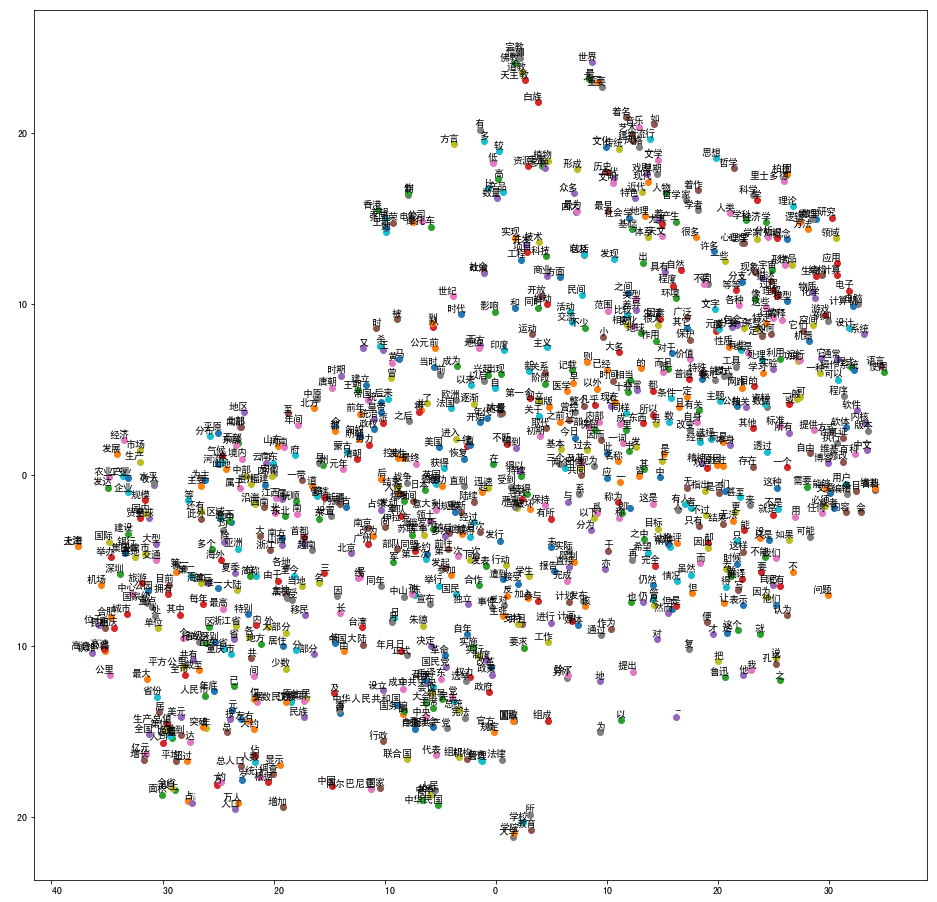

In [33]:
tsne_plot(model)